<a href="https://colab.research.google.com/github/7dgonzalez/mining_hope/blob/main/final_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn import tree

import pandas as pd
import altair as alt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Reading and modifying the first csv file

In [ ]:
df2 = pd.read_csv("Expenditure on health - World Bank Group.csv", skiprows=4)

In [ ]:
drop_columns = ['Indicator Name', 'Indicator Code', 'Country Code' ]
df2 = df2.drop(columns=drop_columns)
display(df2.head())

In [ ]:
df2_melted = df2.melt(
    id_vars=["Country Name"],
    var_name="Year",
    value_name="health_expenditure"
)

In [ ]:
df2_melted["Year"] = pd.to_numeric(df2_melted["Year"], errors='coerce')

In [ ]:
categorical = df2_melted.select_dtypes("object")
categorical.info()

In [ ]:
df2_melted = df2_melted.dropna()

In [ ]:
# fixing the naming convention to match the other csv file
df2_melted['Country Name'] = df2_melted['Country Name'].replace({
    'Africa Western and Central': 'Central African Republic',
    'Viet Nam': 'Vietnam',

})

In [ ]:
# cleaning all the regions that are not necessary so I can merge the two CSV files properly
regions_to_remove = ['Africa Eastern and Southern', 'Central Europe and the Baltics', 'Early-demographic dividend', 'East Asia & Pacific (IDA & IBRD countries)', 'Europe & Central Asia',
                     'Fragile and conflict affected situations', 'East Asia & Pacific (excluding high income)', 'East Asia & Pacific', 'Europe & Central Asia (excluding high income)',
                     'Heavily indebted poor countries (HIPC)', 'High income', 'IBRD only', 'IDA & IBRD total', 'IDA blend', 'Europe & Central Asia (IDA & IBRD countries)',
                     'IDA only', 'IDA total', 'Late-demographic dividend', 'Latin America & Caribbean (excluding high income)',
                     'Latin America & the Caribbean (IDA & IBRD countries)', 'Least developed countries: UN classification', 'Low & middle income', 'Low income',
                     'Lower middle income', 'Middle East & North Africa',  'Middle East & North Africa (IDA & IBRD countries)', 'Middle East & North Africa (excluding high income)', 'Middle income',
                     'Latin America & Caribbean', 'Other small states', 'Pacific island small states', 'OECD members',  'Post-demographic dividend', 'Pre-demographic dividend',
                     'South Asia (IDA & IBRD)', 'Sub-Saharan Africa', 'Sub-Saharan Africa (IDA & IBRD countries)', 'Sub-Saharan Africa (excluding high income)',
                     'North America', 'World', 'Upper middle income', 'Arab World', 'Dominica',
                     'Caribbean small states', 'Euro area', 'European Union', 'Marshall Islands', 'Small states', 'South Asia', 'South Sudan', 'St. Kitts and Nevis', 'Andorra', 'Korea, Rep.']

df2_melted['Country Name'] = df2_melted['Country Name'].str.strip()

# remove rows that match the region names
df2_melted = df2_melted[~df2_melted['Country Name'].isin(regions_to_remove)]

In [ ]:
df2_melted.columns = df2_melted.columns.str.lower()
# make columnnames lower case and replace spaces with underscores
df2_melted.columns = df2_melted.columns.str.lower().str.replace(' ', '_')
print(df2_melted.columns)

In [ ]:
df2_melted['year'] = df2_melted['year'].astype(int)

In [ ]:
df2_melted.rename(columns={'country_name': 'country'}, inplace=True)

In [ ]:
df2_melted.sort_values(by=['country', 'year'], inplace=True)

In [ ]:
df2_melted.head()

Reading and modifying the second csv file

In [ ]:
df3 = pd.read_csv('Life-Expectancy-Data-Updated.csv')
df3.columns = df3.columns.str.lower()
# make columnnames lower case and replace spaces with underscores
df3.columns = df3.columns.str.lower().str.replace(' ', '_')
print(df3.columns)

In [ ]:
print(df3['region'].to_string(index=False))

In [ ]:
df3.sort_values(by=['country', 'year'], inplace=True)

Cleaning Life Expectancy Data

In [ ]:
remove_columns = ['infant_deaths', 'under_five_deaths',
                  'adult_mortality', 'alcohol_consumption', 'hepatitis_b', 'measles',
                  'bmi', 'polio', 'diphtheria', 'incidents_hiv',
                  'population_mln', 'thinness_ten_nineteen_years',
                  'thinness_five_nine_years', 'schooling']

df3 = df3.drop(columns=remove_columns)

In [ ]:
df3.rename(columns={'economy_status_developed': 'developed_country',
                  'economy_status_developing': 'undeveloped_country',
                  'gdp_per_capita': 'gdp'}, inplace=True)

In [ ]:
df3.head()

Mixing both CSV Files to a single one after cleaning them up


In [ ]:
# function to display unique values in df columns
def display_unique_column_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values for column '{column}':")
        print(unique_values)
        print()

In [ ]:
display_unique_column_values(df2_melted)

In [ ]:
display_unique_column_values(df3)

In [ ]:
df3.head()

In [ ]:
df2_melted.head()

In [ ]:
categorical = df3.select_dtypes("object")
categorical.info()

In [ ]:
categorical = df2_melted.select_dtypes("object")
categorical.info()

In [ ]:
numeric_data = df3.select_dtypes("number")
numeric_data.info()

In [ ]:
final_df = pd.merge(df2_melted, df3, on=['country', 'year'], how='inner')

In [ ]:
print(final_df.isnull().sum())

In [ ]:
final_df.to_csv('merged_data.csv', index=False)

Actual start of the assignment

1. Testing different insights with different graphs

In [ ]:
final_df = pd.read_csv("merged_data.csv")

In [ ]:
final_df.head()

In [ ]:
display_unique_column_values(final_df)

In [ ]:
sns.boxplot(x="region", y="life_expectancy", data=final_df, showfliers=False)
plt.xticks(rotation=60)
plt.title("Life Expectancy Distribution by Health Expenditure")
plt.savefig("life_expectancy_boxplot.png", dpi=300, bbox_inches="tight")
plt.show()

There might be a way to automate this whole process, but I decided instead to use 3 different countries to show social and non-social healthcare

Social healthcare

In [ ]:
country_name = "Sweden"
country_df = final_df[final_df["country"] == country_name]

# health expenditure is % of GDP
sns.regplot(x="health_expenditure", y="year", data=country_df)
plt.title(f"Country: {country_name}")
plt.savefig("regplotswed.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
country_name = "Canada"
country_df = final_df[final_df["country"] == country_name]

# health expenditure is % of GDP
sns.regplot(x="health_expenditure", y="year", data=country_df)
plt.title(f"Country: {country_name}")
plt.savefig("regplotca.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
country_name = "Israel"
country_df = final_df[final_df["country"] == country_name]

# health expenditure is % of GDP
sns.regplot(x="health_expenditure", y="year", data=country_df)
plt.title(f"Country: {country_name}")
plt.savefig("regplotis.png", dpi=300, bbox_inches="tight")
plt.show()

Non-social healthcare

In [ ]:
country_name = "United States"
country_df = final_df[final_df["country"] == country_name]

# health expenditure is % of GDP
sns.regplot(x="health_expenditure", y="year", data=country_df)
plt.title(f"Country: {country_name}")
plt.savefig("regplotusa.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
country_name = "New Zealand"
country_df = final_df[final_df["country"] == country_name]

# health expenditure is % of GDP
sns.regplot(x="health_expenditure", y="year", data=country_df)
plt.title(f"Country: {country_name}")
plt.savefig("regplotnz.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
country_name = "El Salvador"
country_df = final_df[final_df["country"] == country_name]

# health expenditure is % of GDP
sns.regplot(x="health_expenditure", y="year", data=country_df)
plt.title(f"Country: {country_name}")
plt.savefig("regplotesa.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
# interesting finding instead of spending more on healthcare, the country's healthcare system is simply declining
country_name = "Afghanistan"
country_df = final_df[final_df["country"] == country_name]

# health expenditure is % of GDP
sns.regplot(x="health_expenditure", y="year", data=country_df)
plt.title(f"Country: {country_name}")
plt.savefig("regplot.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

# plot histogram for life expectancy with development status (stacked)
sns.histplot(data=final_df, x='life_expectancy', hue='developed_country', multiple="stack", palette='Set1', bins=20)

plt.title('Stacked Histogram of Life Expectancy by Developed Status')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.savefig("stacked_histogram_gdp_development_status.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
numeric_data = final_df.select_dtypes("number")
numeric_data.info()

In [ ]:
numeric_columns = final_df.select_dtypes(include=['number'])

Trying to see if I missed any highly correlated features; everything suggests that life expectancy correlates the best

In [ ]:
correlation_matrix = numeric_columns.corr()

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.savefig("correlation.png", dpi=50, bbox_inches="tight")
plt.show()

2. Trying a regressor model

Random Forest

In [ ]:
final_df = pd.read_csv("merged_data.csv")

In [52]:
final_df.head()

,country,year,health_expenditure,region,gdp,developed_country,undeveloped_country,life_expectancy
0,Afghanistan,2002,9.443391,Asia,320,0,1,56.8
1,Afghanistan,2003,8.941258,Asia,332,0,1,57.3
2,Afghanistan,2004,9.808474,Asia,323,0,1,57.8
3,Afghanistan,2005,9.948289,Asia,346,0,1,58.3
4,Afghanistan,2006,10.622766,Asia,354,0,1,58.8


In [ ]:
from sklearn.model_selection import train_test_split

feature_col_names = ['year', 'health_expenditure', 'gdp', 'developed_country', 'undeveloped_country']
predicted_class_names = ['life_expectancy']

# set the split
split_test_size = 0.20

# predictor feature columns (F X m)
X = final_df[feature_col_names].values
# predicted class (1=true, 0=false) column (1 X m)
y = final_df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [ ]:
print("{0:0.2f}% in training set".format((len(X_train)/len(final_df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(final_df.index)) * 100))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train.ravel())

In [ ]:
rf_predict_train = rf_model.predict(X_train)

In [51]:
from sklearn import metrics

r2_train = metrics.r2_score(y_train, rf_predict_train)
print("R-squared on TRAINING SET: {0:.4f}".format(r2_train))

R-squared on TRAINING SET: 0.9672


In [ ]:
mse_train = metrics.mean_squared_error(y_train, rf_predict_train)
print("Mean Squared Error on TRAINING SET: {0:.4f}".format(mse_train))

In [ ]:
mae_train = metrics.mean_absolute_error(y_train, rf_predict_train)
print("Mean Absolute Error on TRAINING SET: {0:.4f}".format(mae_train))

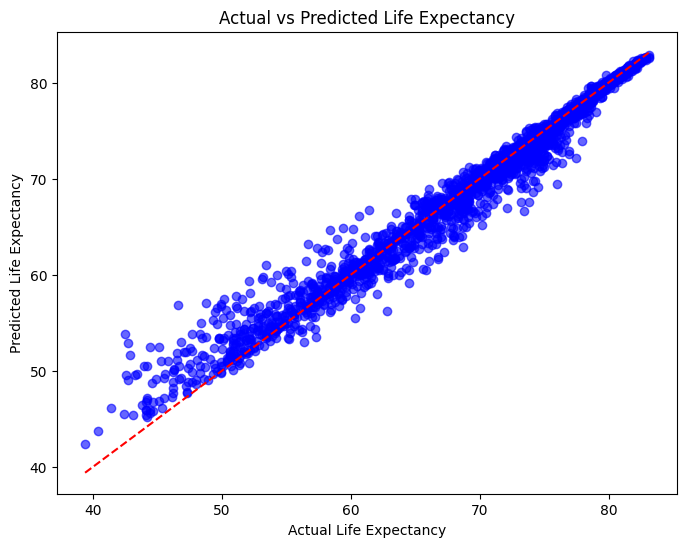

In [50]:
rf_predict_train = rf_model.predict(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(y_train, rf_predict_train, alpha=0.6, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.savefig("test.png", dpi=10, bbox_inches="tight")
plt.show()
